### 5 Fundamentals of machine learning
### Practice Notebook
---
*by Pablo Bauer*

### 5.1 Generalization: The goal of machine learning
---

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_img, train_labels), _ = mnist.load_data()
train_img = train_img.reshape((60000, 28 * 28))
train_img = train_img.astype("float32") / 255

train_img_with_noise_channel = np.concatenate(
    [train_img, np.random.random((len(train_img), 784))], axis=1
)

train_img_with_zeros_channels = np.concatenate(
    [train_img, np.zeros((len(train_img), 784))], axis=1
)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model =  keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dropout(0.5),
      layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  return model

model = get_model()
history_noise = model.fit(
    train_img_with_noise_channel,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_img_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 10s 24ms/step - loss: 0.6894 - accuracy: 0.7838 - val_loss: 0.3376 - val_accuracy: 0.8938
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.3310 - accuracy: 0.8972 - val_loss: 0.2580 - val_accuracy: 0.9215
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2568 - accuracy: 0.9213 - val_loss: 0.1830 - val_accuracy: 0.9451
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2144 - accuracy: 0.9339 - val_loss: 0.1785 - val_accuracy: 0.9491
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1840 - accuracy: 0.9428 - val_loss: 0.1570 - val_accuracy: 0.9556
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1647 - accuracy: 0.9492 - val_loss: 0.1425 - val_accuracy: 0.9582
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1441 - accuracy: 0.9556 - val_loss: 0.1433 - val_accuracy: 0.960

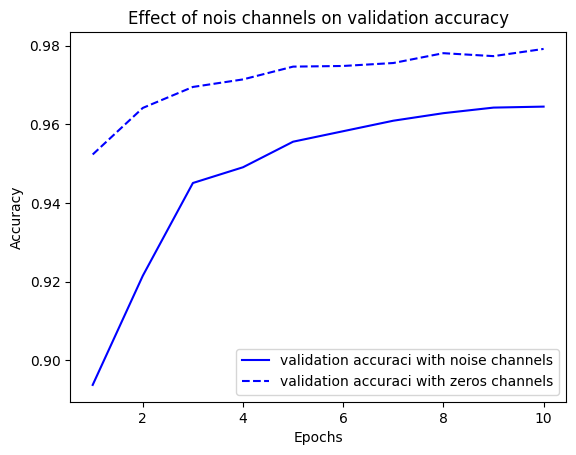

In [8]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs= range(1,11)
plt.plot(epochs, val_acc_noise, "b-", label="validation accuraci with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="validation accuraci with zeros channels")

plt.title("Effect of nois channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
